In [37]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from CSIKit.reader import get_reader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pywt


In [38]:
csv_dir='csi_csv/'
filenames = [f[:-4] for f in listdir(csv_dir)
    if isfile(join(csv_dir, f))]
actions={}
actionfiles={}
for f in filenames:
    ff=f[:-11]
    if ff not in actions.keys():
        actions[ff]=1
        actionfiles[ff]=[f]
    else:
        actions[ff]+=1
        actionfiles[ff]+= [f]
print(actions)

{'brushteeth': 100, 'cook': 100, 'drink': 65, 'getintobed': 100, 'nothing': 100, 'petcat': 2, 'sitdown_chair': 51, 'sitdown_sofa': 55, 'sleeping': 100, 'standup_chair': 50, 'standup_sofa': 55, 'test': 3, 'walk': 97, 'washingdishes': 100}


importing dataframes

In [39]:
dfs={}
for a in actions.keys():
    print(a)
    dfs[a]=[]
    for f in actionfiles[a]:
        dfs[a].append(pd.read_csv(join(csv_dir,f+".csv")))
dfs[a][-1]

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0          1          2          3          4          5  \
0   -39.974250 -44.421902 -56.530436 -49.540736 -50.509836 -46.423197   
1   -50.522500 -44.434566 -52.563700 -59.553400 -49.553400 -50.010975   
2   -44.689419 -44.413584 -49.532417 -55.553017 -50.238228 -39.098794   
3   -47.933366 -44.428212 -43.526446 -47.505846 -53.014921 -50.252857   
4   -46.012607 -44.415598 -56.524132 -47.229943 -49.992007 -43.406593   
..         ...        ...        ...        ...        ...        ...   
333 -43.259888 -44.424944 -46.533477 -59.543777 -37.841160 -48.404344   
334 -48.396406 -44.417006       -inf -51.406706 -46.014014 -51.406706   
335 -44.159595 -44.603786 -55.743220 -43.438731 -53.702020 -46.712320   
336 -40.828060 -44.430789 -44.234833 -55.570222 -52.559923 -43.265733   
337 -46.869287 -44.422170 -53.520404 -43.008879 -40.246814 -39.695731   

             6          7          8          9  ...        246        247  \
0   -12.491599  -9.243774  -7.514913  -5.720241  ... -15.150411 -10.886083   
1   -12.423159  -9.299256  -7.509025  -5.598170  ... -15.195912 -11.467982   
2   -12.812132  -9.433810  -7.143680  -5.428112  ... -15.313007 -11.373984   
3   -13.736371 -10.243211  -7.189237  -5.339100  ... -13.989513 -10.324516   
4   -12.564930  -9.648085  -7.829277  -5.645528  ... -15.283656 -11.227744   
..         ...        ...        ...        ...  ...        ...        ...   
333 -13.177594  -9.400378  -6.767949  -5.138426  ... -13.737892 -10.414732   
334 -12.799319  -9.560818  -6.818539  -5.282845  ... -13.714069 -10.429568   
335 -46.605081 -53.190495 -46.712320 -48.583186  ... -24.326841 -17.808669   
336 -12.267952  -9.530534  -7.041399  -5.451475  ... -14.677037 -10.606545   
337 -13.121902  -9.728346  -6.914547  -5.477339  ... -13.956018 -10.232277   

           248        249        250        251        252        253  \
0    -7.970825  -5.884312  -4.779233 -62.551036 -41.906456 -40.592039   
1    -8.343303  -6.081144  -4.974641 -43.990375 -45.661739 -41.424266   
2    -8.247504  -6.179634  -4.797722 -55.553017 -47.491217 -41.573617   
3    -7.759693  -6.179357  -5.065659 -46.994321 -42.387013 -42.689629   
4    -8.079981  -5.909136  -4.903000 -46.012607 -46.416893 -44.415598   
..         ...        ...        ...        ...        ...        ...   
333  -7.931176  -6.417921  -5.163467 -49.543777 -43.920849 -49.543777   
334  -7.861189  -6.460013  -5.201198 -42.015355 -48.566739 -42.502926   
335 -27.624790 -21.367934 -18.853152 -20.772540 -17.031929 -48.108940   
336  -8.109660  -6.172615  -5.095691 -42.692205 -47.245133 -40.828060   
337  -7.648909  -6.438214  -5.167542 -47.236514 -50.246815 -46.988279   

           254        255  
0   -45.561336 -53.008611  
1   -48.413967 -40.831837  
2   -50.501517 -43.048817  
3   -45.314587 -48.407612  
4   -48.565332 -52.544732  
..         ...        ...  
333 -48.404344 -48.404344  
334 -45.556439 -44.911860  
335 -48.753520 -45.743220  
336 -39.704349 -48.580522  
337 -40.819441 -48.571904  

[338 rows x 256 columns]

DotPlot

In [40]:
dfs_copy=dfs

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


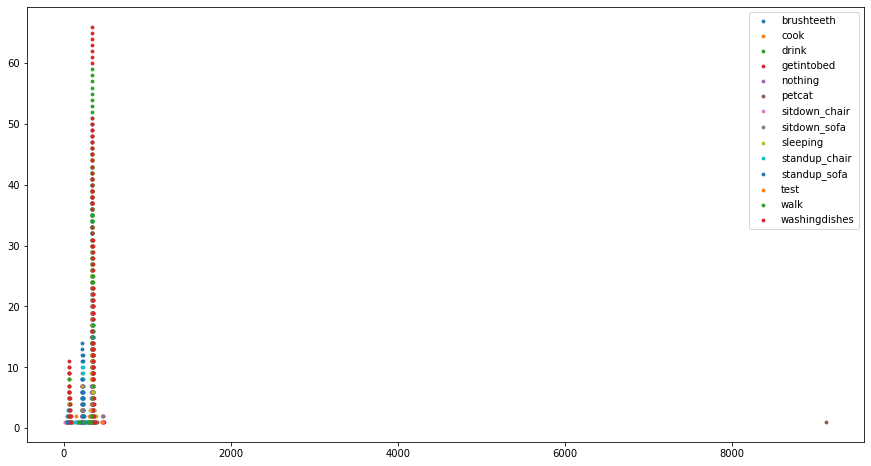

In [41]:
plt.figure(figsize=(15,8))
counts_for_lengths={}
plot_x={}
plot_y={}
for a in actions.keys():
    plot_x[a]=[]
    plot_y[a]=[]
    for df in dfs[a]:
        x=df.shape[0]
        if x not in counts_for_lengths.keys():
            counts_for_lengths[x]=1
            y=1
        else:
            y=counts_for_lengths[x]+1
            counts_for_lengths[x]+=1
        plot_x[a].append(x)
        plot_y[a].append(y)
    print(a)
    plt.scatter(plot_x[a],plot_y[a],label=a,s=8)

plt.legend()
plt.show()

DotPlot without petcat

brushteeth
cook
drink
getintobed
nothing
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


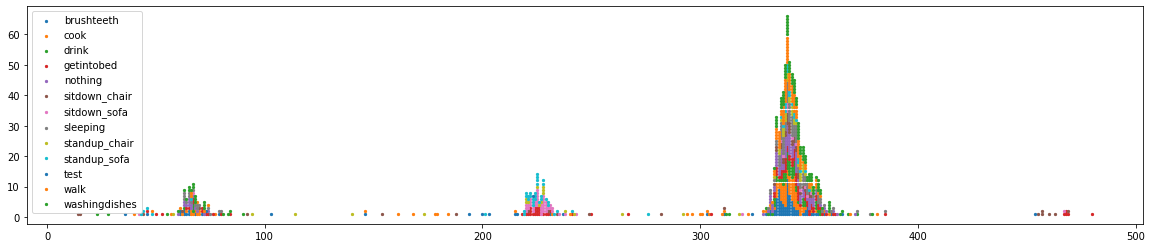

In [42]:
plt.figure(figsize=(20,4))
counts_for_lengths={}
plot_x={}
plot_y={}
for a in actions.keys():
    if a=='petcat':
        continue
    plot_x[a]=[]
    plot_y[a]=[]
    for df in dfs[a]:
        x=df.shape[0]
        if x not in counts_for_lengths.keys():
            counts_for_lengths[x]=1
            y=1
        else:
            y=counts_for_lengths[x]+1
            counts_for_lengths[x]+=1
        plot_x[a].append(x)
        plot_y[a].append(y)
    print(a)
    plt.scatter(plot_x[a],plot_y[a],label=a,s=5)

plt.legend()
plt.show()

Replacing NaNs and INFs

In [43]:
dfs_={}
for action in dfs.keys():
    dfs_[action]=[]
    i=0
    for df in dfs[action]:
        df_=df.replace(np.inf,np.nan,inplace=False)
        df_.replace(-np.inf,np.nan,inplace=True)
        df_.fillna(df_.median(),inplace=True)
        if np.isnan(df_).values.sum()>0:
            i+=1
        else:
            dfs_[action].append(df_)
    print(action,i)
dfs_[action][-1]

brushteeth 0
cook 0
drink 0
getintobed 89
nothing 0
petcat 0
sitdown_chair 11
sitdown_sofa 0
sleeping 0
standup_chair 12
standup_sofa 0
test 1
walk 0
washingdishes 0


0          1          2          3          4          5  \
0   -39.974250 -44.421902 -56.530436 -49.540736 -50.509836 -46.423197   
1   -50.522500 -44.434566 -52.563700 -59.553400 -49.553400 -50.010975   
2   -44.689419 -44.413584 -49.532417 -55.553017 -50.238228 -39.098794   
3   -47.933366 -44.428212 -43.526446 -47.505846 -53.014921 -50.252857   
4   -46.012607 -44.415598 -56.524132 -47.229943 -49.992007 -43.406593   
..         ...        ...        ...        ...        ...        ...   
333 -43.259888 -44.424944 -46.533477 -59.543777 -37.841160 -48.404344   
334 -48.396406 -44.417006 -48.537739 -51.406706 -46.014014 -51.406706   
335 -44.159595 -44.603786 -55.743220 -43.438731 -53.702020 -46.712320   
336 -40.828060 -44.430789 -44.234833 -55.570222 -52.559923 -43.265733   
337 -46.869287 -44.422170 -53.520404 -43.008879 -40.246814 -39.695731   

             6          7          8          9  ...        246        247  \
0   -12.491599  -9.243774  -7.514913  -5.720241  ... -15.150411 -10.886083   
1   -12.423159  -9.299256  -7.509025  -5.598170  ... -15.195912 -11.467982   
2   -12.812132  -9.433810  -7.143680  -5.428112  ... -15.313007 -11.373984   
3   -13.736371 -10.243211  -7.189237  -5.339100  ... -13.989513 -10.324516   
4   -12.564930  -9.648085  -7.829277  -5.645528  ... -15.283656 -11.227744   
..         ...        ...        ...        ...  ...        ...        ...   
333 -13.177594  -9.400378  -6.767949  -5.138426  ... -13.737892 -10.414732   
334 -12.799319  -9.560818  -6.818539  -5.282845  ... -13.714069 -10.429568   
335 -46.605081 -53.190495 -46.712320 -48.583186  ... -24.326841 -17.808669   
336 -12.267952  -9.530534  -7.041399  -5.451475  ... -14.677037 -10.606545   
337 -13.121902  -9.728346  -6.914547  -5.477339  ... -13.956018 -10.232277   

           248        249        250        251        252        253  \
0    -7.970825  -5.884312  -4.779233 -62.551036 -41.906456 -40.592039   
1    -8.343303  -6.081144  -4.974641 -43.990375 -45.661739 -41.424266   
2    -8.247504  -6.179634  -4.797722 -55.553017 -47.491217 -41.573617   
3    -7.759693  -6.179357  -5.065659 -46.994321 -42.387013 -42.689629   
4    -8.079981  -5.909136  -4.903000 -46.012607 -46.416893 -44.415598   
..         ...        ...        ...        ...        ...        ...   
333  -7.931176  -6.417921  -5.163467 -49.543777 -43.920849 -49.543777   
334  -7.861189  -6.460013  -5.201198 -42.015355 -48.566739 -42.502926   
335 -27.624790 -21.367934 -18.853152 -20.772540 -17.031929 -48.108940   
336  -8.109660  -6.172615  -5.095691 -42.692205 -47.245133 -40.828060   
337  -7.648909  -6.438214  -5.167542 -47.236514 -50.246815 -46.988279   

           254        255  
0   -45.561336 -53.008611  
1   -48.413967 -40.831837  
2   -50.501517 -43.048817  
3   -45.314587 -48.407612  
4   -48.565332 -52.544732  
..         ...        ...  
333 -48.404344 -48.404344  
334 -45.556439 -44.911860  
335 -48.753520 -45.743220  
336 -39.704349 -48.580522  
337 -40.819441 -48.571904  

[338 rows x 256 columns]

Data normalization

In [44]:
dfs__={}
for action in dfs_.keys():
    dfs__[action]=[]
    for df_ in dfs_[action]:
        dfs__[action].append(pd.DataFrame(StandardScaler().fit_transform(df_)))
    print(action)
dfs__[action][-1]

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0         1         2         3         4         5         6    \
0    1.626238  0.199839 -1.474945 -0.264992 -0.596852  0.160401  0.360380   
1   -1.472511 -0.090555 -0.687412 -2.219461 -0.403546 -0.527377  0.367141   
2    0.241068  0.390590 -0.085598 -1.438587 -0.541957  1.564493  0.328710   
3   -0.711903  0.055146  1.106794  0.132218 -1.103158 -0.573746  0.237394   
4   -0.147644  0.344395 -1.473694  0.186075 -0.492193  0.738686  0.353134   
..        ...       ...       ...       ...       ...       ...       ...   
333  0.661020  0.130096  0.509795 -2.217582  1.963629 -0.219385  0.292602   
334 -0.847930  0.312117  0.111880 -0.629228  0.311804 -0.794940  0.329976   
335  0.396714 -3.970847 -1.318656  0.926118 -1.242029  0.104977 -3.010089   
336  1.375416 -0.003937  0.966155 -1.441946 -1.011198  0.765689  0.382476   
337 -0.399310  0.193696 -0.877350  1.010025  1.477419  1.450060  0.298104   

          7         8         9    ...       246       247       248  \
0    0.353967  0.298444  0.298476  ...  0.218919  0.272790  0.299755   
1    0.348994  0.298945  0.308190  ...  0.213496  0.216426  0.266277   
2    0.336934  0.330064  0.321723  ...  0.199541  0.225531  0.274888   
3    0.264384  0.326184  0.328806  ...  0.357271  0.327184  0.318732   
4    0.317727  0.271667  0.304422  ...  0.203039  0.239696  0.289944   
..        ...       ...       ...  ...       ...       ...       ...   
333  0.339930  0.362068  0.344775  ...  0.387258  0.318445  0.303319   
334  0.325549  0.357759  0.333283  ...  0.390097  0.317008  0.309609   
335 -3.585150 -3.040257 -3.112391  ... -0.874699 -0.397738 -1.466727   
336  0.328264  0.338776  0.319864  ...  0.275334  0.299866  0.287277   
337  0.310533  0.349581  0.317806  ...  0.361263  0.336118  0.328689   

          249       250       251       252       253       254       255  
0    0.314963  0.315585 -2.522619  0.853752  1.131004  0.383566 -0.701435  
1    0.297689  0.298926  0.494789  0.230685  0.964364 -0.149840  1.769565  
2    0.289046  0.314008 -1.384951 -0.072857  0.934458 -0.540186  1.319679  
3    0.289070  0.291166  0.006437  0.774020  0.710994  0.429705  0.232233  
4    0.312785  0.305033  0.166035  0.105392  0.365395 -0.178143 -0.607301  
..        ...       ...       ...       ...       ...       ...       ...  
333  0.268133  0.282828 -0.408028  0.519529 -0.661444 -0.148041  0.232897  
334  0.264439  0.279612  0.815868 -0.251305  0.748379  0.384481  0.941617  
335 -1.043886 -0.884233  4.269314  4.980872 -0.374139 -0.213332  0.772911  
336  0.289662  0.288606  0.705833 -0.032028  1.083745  1.478748  0.197145  
337  0.266352  0.282481 -0.032936 -0.530059 -0.149744  1.270240  0.198894  

[338 rows x 256 columns]

Splitting data to train and test

In [45]:
train={}
test={}
test_part=0.3

for action in dfs__.keys():  
    i=int(len(dfs__[action])*(1-test_part)+0.5)
    train[action]=dfs__[action][:i]
    test[action]=dfs__[action][i:]
    print(action,len(dfs__[action]),len(train[action]),len(test[action]))
train[action][-1]

brushteeth 100 70 30
cook 100 70 30
drink 65 46 19
getintobed 11 8 3
nothing 100 70 30
petcat 2 1 1
sitdown_chair 40 28 12
sitdown_sofa 55 39 16
sleeping 100 70 30
standup_chair 38 27 11
standup_sofa 55 39 16
test 2 1 1
walk 97 68 29
washingdishes 100 70 30


0         1         2         3         4         5         6    \
0    0.432702  0.194246 -0.342792 -0.014030 -2.045442 -0.409799  0.347239   
1    0.791995  0.135750  0.795874 -0.326782  0.367490 -0.595514  0.279266   
2    0.794310 -0.126121 -0.584351 -2.773355 -0.610388  0.754210 -3.251827   
3    0.695930  0.294305 -0.060906 -0.317402  1.199393  0.098683  0.255147   
4   -1.259760  0.258427  0.634928 -0.043221  0.455947  0.917256  0.368571   
..        ...       ...       ...       ...       ...       ...       ...   
349  0.986212  0.238083 -0.562631 -0.044425 -2.580939  0.073061  0.336498   
350  0.676941  0.245177  0.851805  0.538998  0.032509  0.593200  0.323911   
351 -0.017990  0.274180 -0.560478 -2.749673  0.456807 -1.720439  0.347256   
352  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   
353  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   

          7         8         9    ...       246       247       248  \
0    0.341461  0.354968  0.350268  ...  0.337284  0.332990  0.319537   
1    0.317942  0.350299  0.339447  ...  0.426810  0.359277  0.334107   
2   -2.634481 -2.824780 -2.738286  ... -3.598024 -3.084671 -2.512196   
3    0.294178  0.328048  0.329703  ...  0.478064  0.377034  0.337085   
4    0.363476  0.326641  0.329702  ...  0.381226  0.312349  0.311067   
..        ...       ...       ...  ...       ...       ...       ...   
349  0.315986  0.287509  0.312564  ...  0.342756  0.303761  0.325369   
350  0.346064  0.349953  0.342579  ...  0.238873  0.272699  0.317254   
351  0.340380  0.328496  0.336005  ...  0.174428  0.318244  0.322850   
352  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   
353  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   

          249       250       251       252       253       254       255  
0    0.299610  0.325642 -0.371796 -1.128219 -2.082596 -2.922178  0.584247  
1    0.315598  0.319637  0.820160  1.125823 -0.723591 -2.345506 -0.249945  
2    0.326790 -2.905586  0.219035 -1.570999 -0.876767  0.552629 -2.481917  
3    0.309214  0.314968  1.367777  0.505919  0.870445 -1.077367 -1.065850  
4    0.326950  0.328762  0.759217  0.891559 -0.108591 -2.338285  1.134632  
..        ...       ...       ...       ...       ...       ...       ...  
349  0.334710  0.331309 -0.838523  0.459067  0.619205 -0.548399 -0.663194  
350  0.305090  0.324795 -0.051484  0.382992 -0.109380 -0.992079  1.378996  
351  0.317866  0.325961 -0.190542  0.148381 -0.266139  0.405380  0.536726  
352  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  
353  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  

[354 rows x 256 columns]

In [46]:
train_={}
for action in train.keys():
    train_[action]=pd.concat(train[action],ignore_index=True)

train_[action]

0         1         2         3         4         5         6    \
0     -1.770765  0.017663  0.753347 -0.002533 -0.466485  0.668420  0.387564   
1      1.149141 -0.042643 -0.651994 -0.196018  1.052856 -0.066763  0.428052   
2     -1.375505 -0.290215 -0.360736  0.107318 -0.297342 -0.167335 -2.976342   
3      0.310749  0.038394  0.935690  0.923662 -1.431746  0.623464  0.393213   
4     -2.113040 -0.021714 -0.650894  0.395991 -0.641071 -1.660522  0.376497   
...         ...       ...       ...       ...       ...       ...       ...   
20573  0.986212  0.238083 -0.562631 -0.044425 -2.580939  0.073061  0.336498   
20574  0.676941  0.245177  0.851805  0.538998  0.032509  0.593200  0.323911   
20575 -0.017990  0.274180 -0.560478 -2.749673  0.456807 -1.720439  0.347256   
20576  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   
20577  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   

            7         8         9    ...       246       247       248  \
0      0.340745  0.317945  0.316832  ...  0.388576  0.337085  0.313622   
1      0.382080  0.338902  0.329580  ...  0.369694  0.330687  0.316927   
2     -3.289825 -2.625709 -2.638306  ... -1.726375 -2.353707 -1.006884   
3      0.367985  0.312508  0.322981  ...  0.350580  0.320572  0.310966   
4      0.337636  0.334886  0.336282  ...  0.387397  0.344688  0.324546   
...         ...       ...       ...  ...       ...       ...       ...   
20573  0.315986  0.287509  0.312564  ...  0.342756  0.303761  0.325369   
20574  0.346064  0.349953  0.342579  ...  0.238873  0.272699  0.317254   
20575  0.340380  0.328496  0.336005  ...  0.174428  0.318244  0.322850   
20576  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   
20577  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   

            249       250       251       252       253       254       255  
0      0.314299  0.318442 -2.605980  0.867814  0.845887  0.517368 -0.599079  
1      0.318256  0.311567 -0.220879  0.893769  0.582707  0.064791 -0.602528  
2     -0.823939 -0.685800  5.366345  5.418324 -1.799300 -0.036841  0.243576  
3      0.316255  0.316909 -0.245852 -0.044154  1.033559 -0.547682  1.087316  
4      0.313710  0.312604  0.182148 -1.658400  0.719701 -0.497112  0.022719  
...         ...       ...       ...       ...       ...       ...       ...  
20573  0.334710  0.331309 -0.838523  0.459067  0.619205 -0.548399 -0.663194  
20574  0.305090  0.324795 -0.051484  0.382992 -0.109380 -0.992079  1.378996  
20575  0.317866  0.325961 -0.190542  0.148381 -0.266139  0.405380  0.536726  
20576  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  
20577  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  

[20578 rows x 256 columns]

In [47]:
training_amplitudes=pd.concat(list(train_.values()),ignore_index=True)
training_amplitudes

0         1         2         3         4         5         6    \
0      -0.155353  0.044088 -0.398748  1.520893 -2.246950  0.237398  0.392273   
1       0.635670  0.094141 -1.213706 -1.543062  1.531583 -1.428443  0.272896   
2       1.362030  0.010428 -0.715213 -0.016152  0.508057  0.486647  0.352408   
3       1.042190  0.090572  0.196870 -1.356793  0.446261 -0.938645  0.373541   
4       0.764868  0.143389 -0.617941 -2.698861  0.499028 -1.611890  0.392187   
...          ...       ...       ...       ...       ...       ...       ...   
188810  0.986212  0.238083 -0.562631 -0.044425 -2.580939  0.073061  0.336498   
188811  0.676941  0.245177  0.851805  0.538998  0.032509  0.593200  0.323911   
188812 -0.017990  0.274180 -0.560478 -2.749673  0.456807 -1.720439  0.347256   
188813  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   
188814  0.109720  0.115621  0.106633  0.152948  0.207994  0.164160  0.339744   

             7         8         9    ...       246       247       248  \
0       0.344951  0.285920  0.294684  ...  0.164052  0.223462  0.268599   
1       0.285477  0.312442  0.310333  ...  0.383770  0.338221  0.324008   
2       0.309219  0.293156  0.279969  ...  0.263753  0.290179  0.302164   
3       0.302864  0.281489  0.278827  ...  0.417532  0.350681  0.313694   
4       0.330540  0.319385  0.299773  ...  0.336207  0.274548  0.276019   
...          ...       ...       ...  ...       ...       ...       ...   
188810  0.315986  0.287509  0.312564  ...  0.342756  0.303761  0.325369   
188811  0.346064  0.349953  0.342579  ...  0.238873  0.272699  0.317254   
188812  0.340380  0.328496  0.336005  ...  0.174428  0.318244  0.322850   
188813  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   
188814  0.345059  0.343734  0.346391  ...  0.321703  0.324613  0.332305   

             249       250       251       252       253       254       255  
0       0.314924  0.294942  0.645957  0.977579  0.580006 -0.083187  0.838796  
1       0.279954  0.279941  0.286824  0.486835  0.834993 -3.145914  1.209984  
2       0.316693  0.290267  0.916100 -1.178713 -0.782221  0.056260 -1.271809  
3       0.290450  0.274196  0.064226 -0.040481  1.214526 -1.747032  0.676800  
4       0.272355  0.274141  0.635726  0.244609 -0.775057  0.257466  1.000321  
...          ...       ...       ...       ...       ...       ...       ...  
188810  0.334710  0.331309 -0.838523  0.459067  0.619205 -0.548399 -0.663194  
188811  0.305090  0.324795 -0.051484  0.382992 -0.109380 -0.992079  1.378996  
188812  0.317866  0.325961 -0.190542  0.148381 -0.266139  0.405380  0.536726  
188813  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  
188814  0.326790  0.336367  0.046177  0.069447  0.105727  0.163451  0.127684  

[188815 rows x 256 columns]

PCA

In [48]:
pca = PCA(n_components=4)
#[0.68309911, 0.0747391 , 0.02834463, 0.01458156, 0.00818686,
#       0.00785816, 0.00586683, 0.00469873]
pca.fit(training_amplitudes)
pca.explained_variance_ratio_

array([0.68252625, 0.07473828, 0.02834187, 0.01458055])

In [49]:
def apply_pca(pca,data):
    dct={}
    for action in data.keys():
        dct[action]=[]
        for df in data[action]:
            df_pca=pd.DataFrame(pca.transform(df))
            dct[action].append(df_pca)
        print(action)
    return dct

In [50]:
pca_train=apply_pca(pca,train)
pca_test=apply_pca(pca,test)


pca_train['washingdishes'][-1]


brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes
brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


0         1         2         3
0    -4.488749 -3.028486 -0.195458  0.522877
1    -4.175406  2.555046 -0.045376 -0.418606
2    38.577227 -3.081906 -3.373298  0.142429
3    -4.268190  6.753591 -0.665633 -0.936485
4    -4.098244  2.383834 -0.124220 -0.758778
..         ...       ...       ...       ...
349  -4.837992  6.267127 -0.919523  0.113169
350  -6.112688 -8.107545 -0.239360  0.937348
351  -5.289880 -3.379844 -0.323384  0.195274
352  -4.154365  0.637302  0.262241 -0.065764
353  -4.154365  0.637302  0.262241 -0.065764

[354 rows x 4 columns]

In [51]:
def save_in_csv(dir,data):
    for action in data.keys():
        for i in range(len(data[action])):
            data[action][i].to_csv(join(dir,action+f"_{i}.csv"),index=False)
        print(action)

In [52]:
save_in_csv('pca_train/',pca_train)


brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


In [53]:
save_in_csv('pca_test/',pca_test)

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


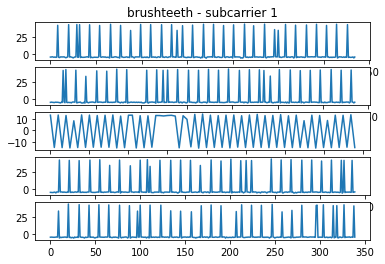

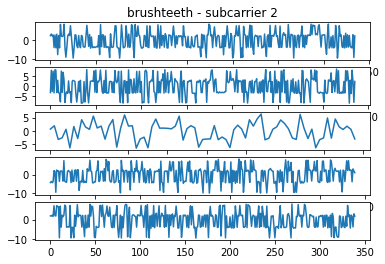

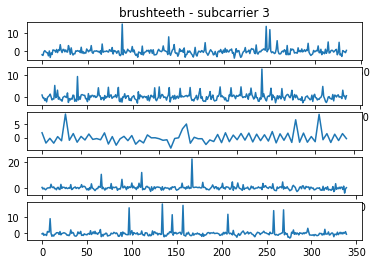

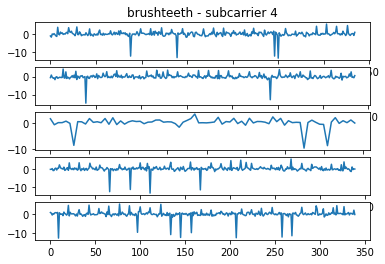

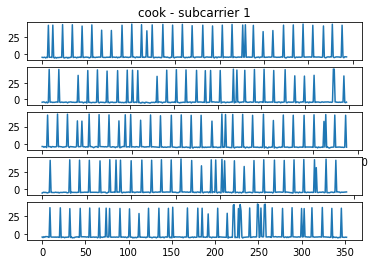

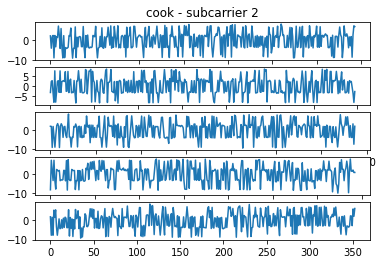

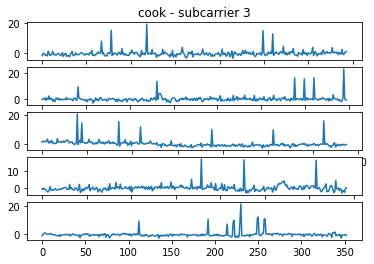

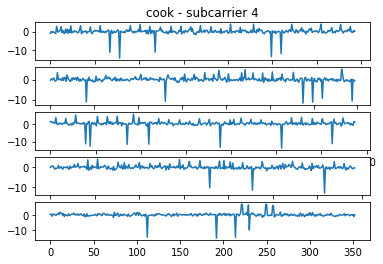

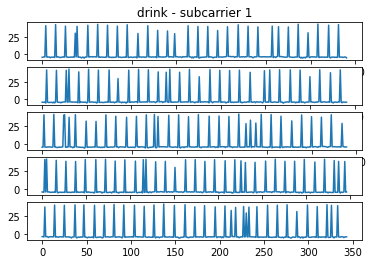

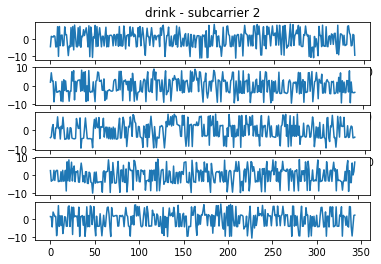

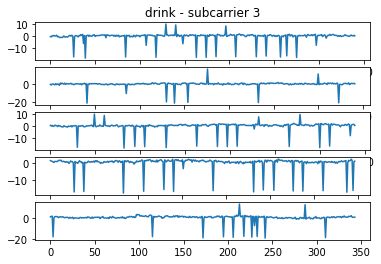

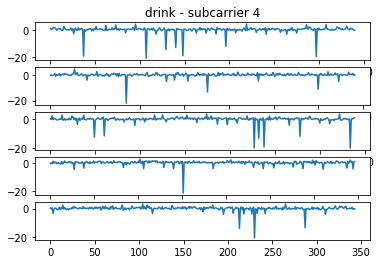

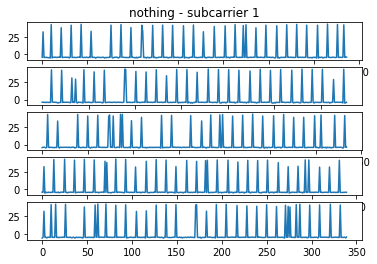

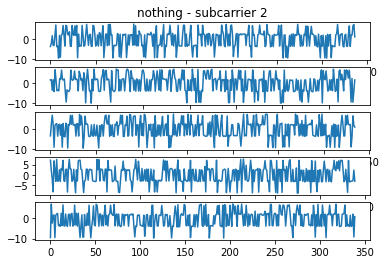

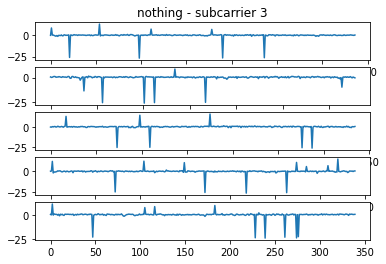

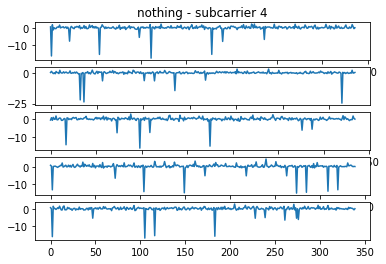

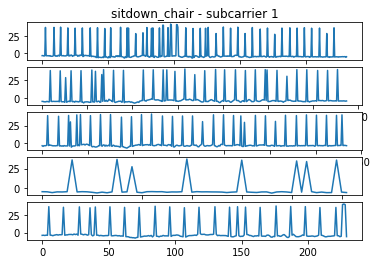

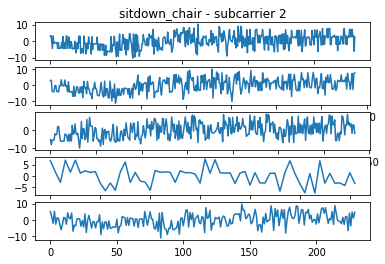

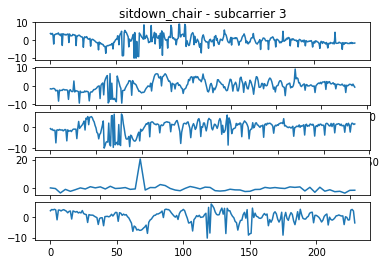

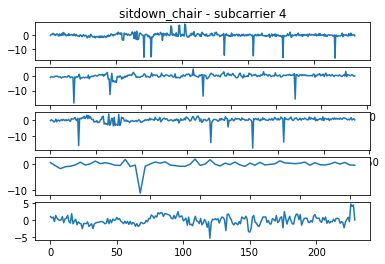

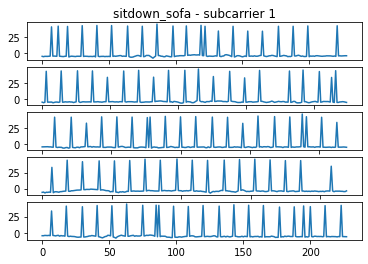

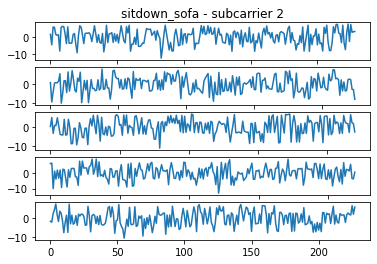

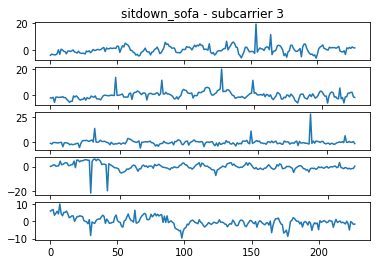

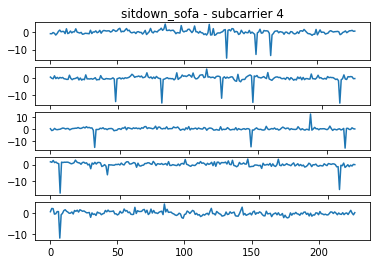

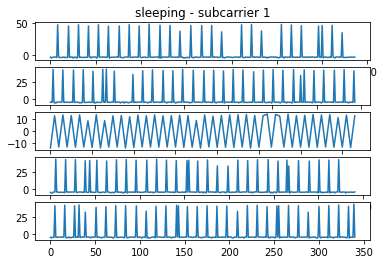

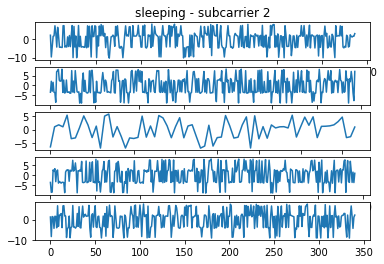

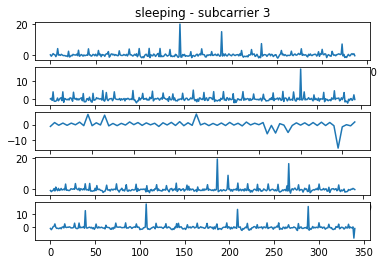

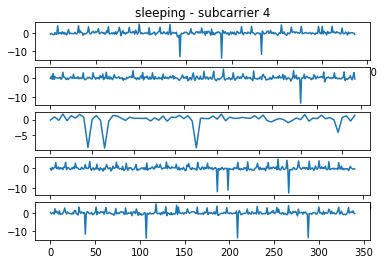

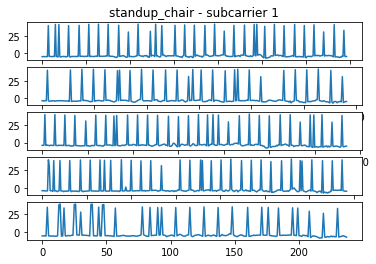

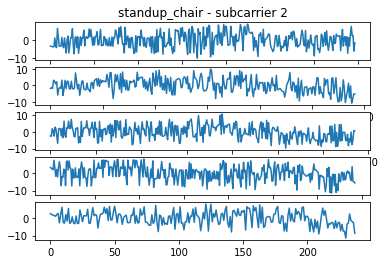

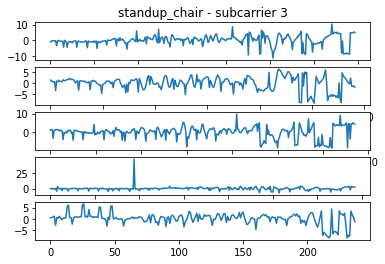

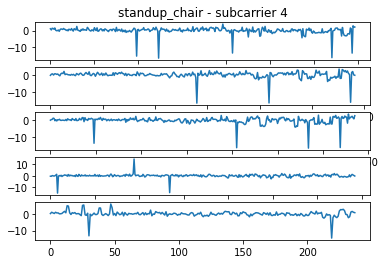

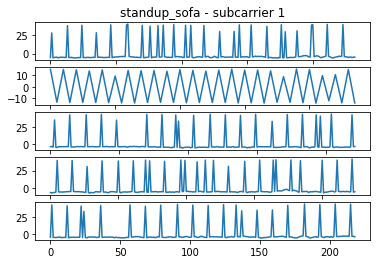

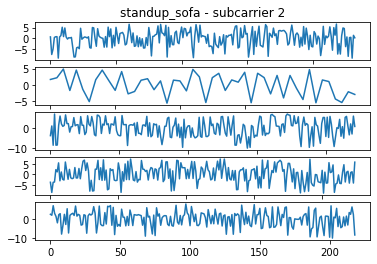

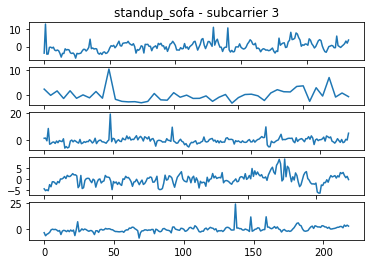

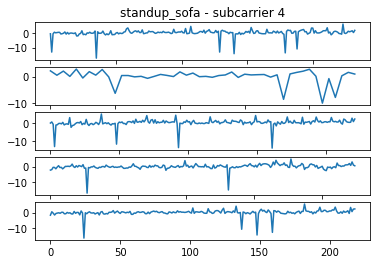

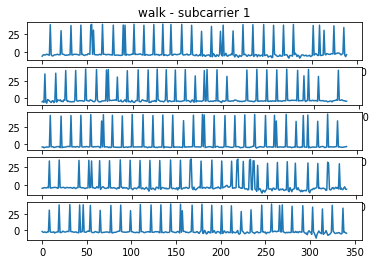

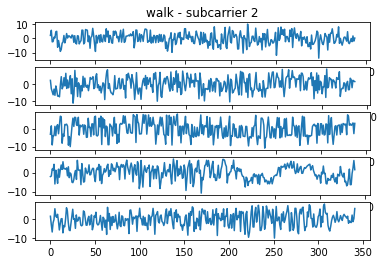

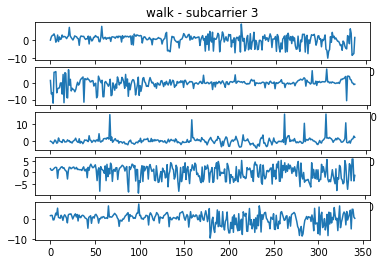

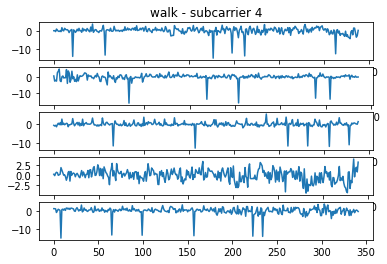

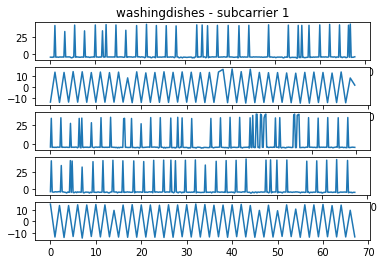

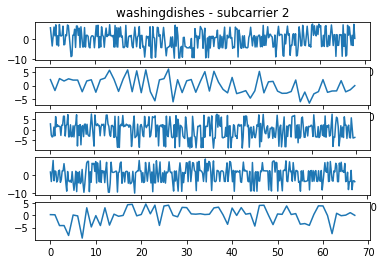

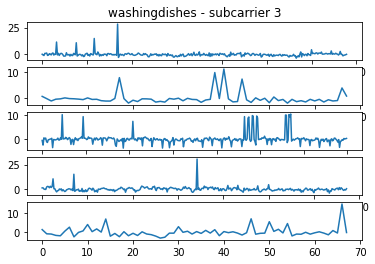

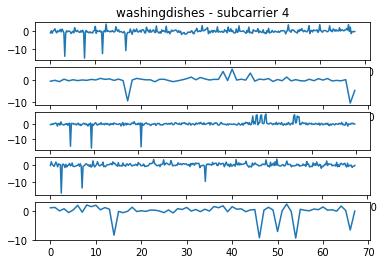

In [54]:
for action in pca_train.keys():
    if len(pca_train[action])<=10:
        continue
    for i in range(4):
        f, ax = plt.subplots(nrows=5)
        ax[0].set_title(action+" - subcarrier "+str(i+1))
        for j in range(5,10):
            pca_train[action][j][i].plot.line(ax=ax[j-5])
        plt.show()

CWT

In [55]:
pca_train['washingdishes'][0]

0         1         2          3
0    -4.375311  3.367237 -0.034246   0.741081
1    -4.740992 -3.384409  1.064379  -0.261904
2    33.968119  3.038192  3.272114 -14.760692
3    -4.351954  3.494488  0.001740  -0.161814
4    -4.300926  3.563218 -0.021812   0.530699
..         ...       ...       ...        ...
334  41.596061 -2.493843 -3.597332   0.768931
335  -4.119107 -3.424602  0.321557  -0.409281
336  -4.101933 -2.989973  0.314925  -0.654844
337  -3.940860  2.531408  0.245273  -0.613458
338  -3.873365  2.648007 -0.036521   0.034134

[339 rows x 4 columns]

In [56]:
def our_cwt(data,to_plot=False):
    N = 7
    L = 15
    scales = np.array([2 ** (n + (l / L)) for n in range(N) for l in range(L)])

    res={}

    for action in data.keys():
        res[action]=[]
        for df in data[action]:
            cwts=[]
            for i in range(df.shape[1]):
                coef, freqs=pywt.cwt(df[i], scales,'mexh')
                cwts.append(coef)
            if to_plot:
                if not res[action]:
                    f, ax= plt.subplots(1,len(cwts),figsize=(20,4))
                    plt.title(action)
                    for i in range(len(cwts)):
                        sns.heatmap(cwts[i],ax=ax[i], cmap='jet')
                    plt.show()
            res[action].append(cwts)
        if not to_plot:
            print(action)
    return res

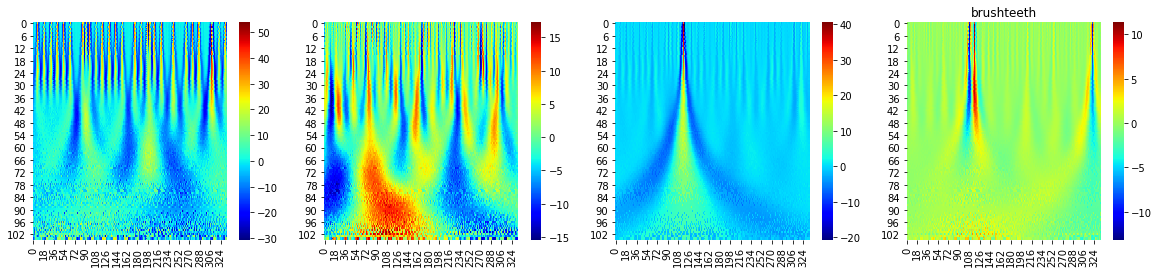

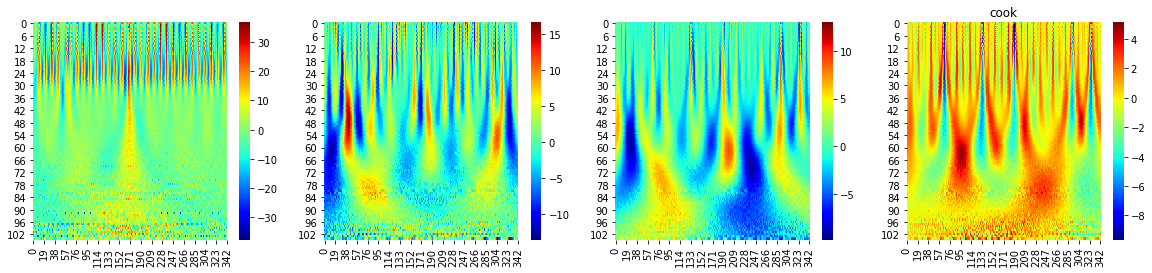

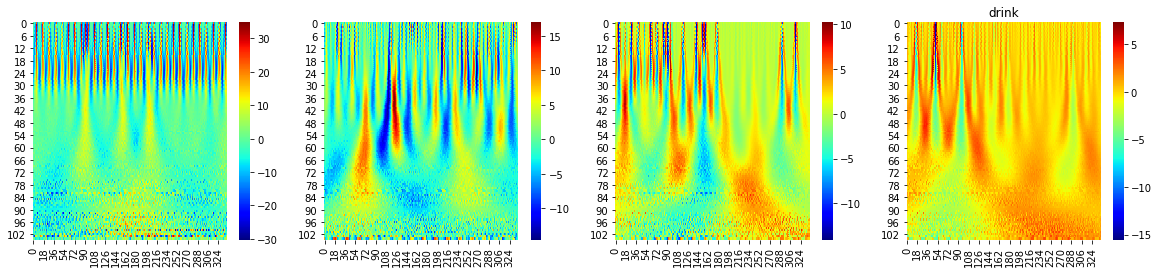

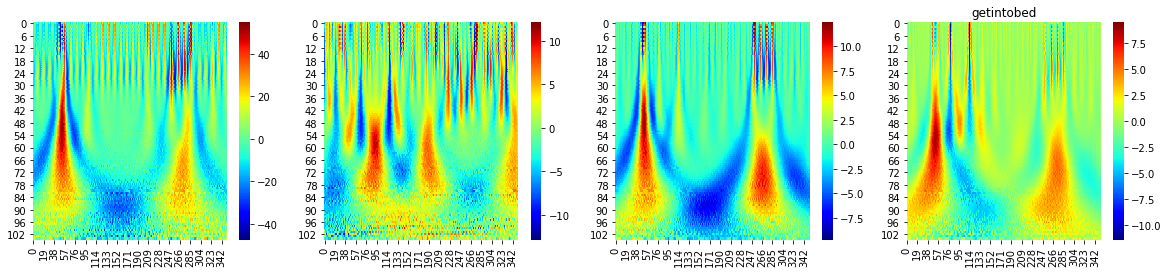

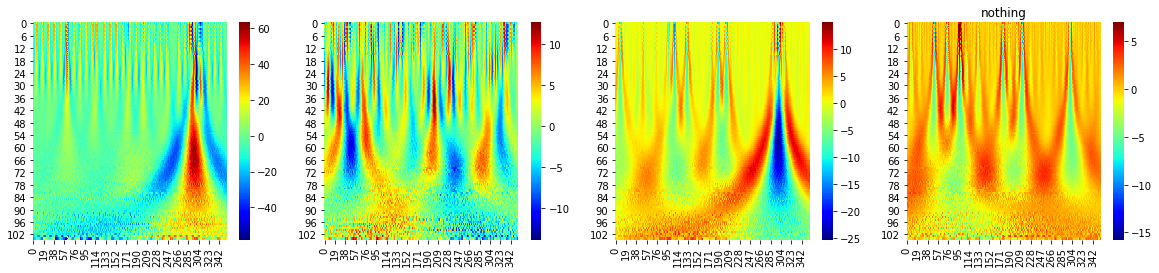

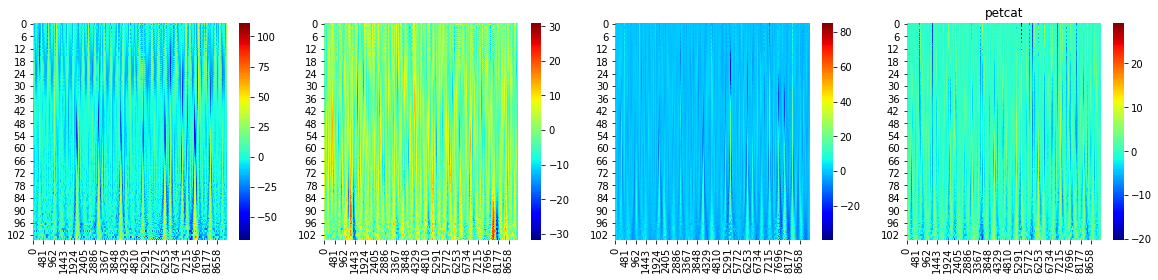

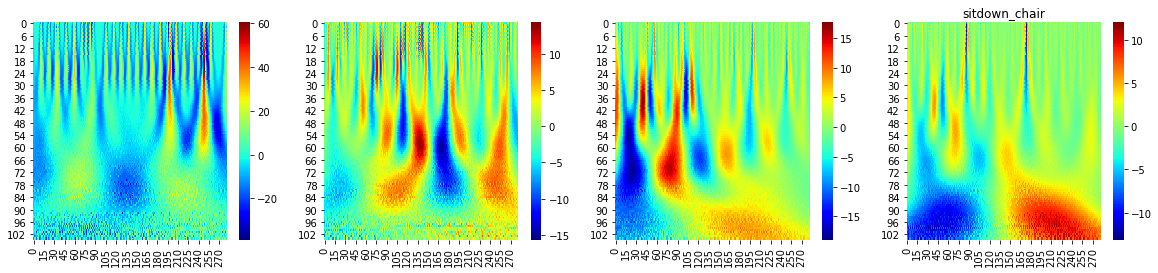

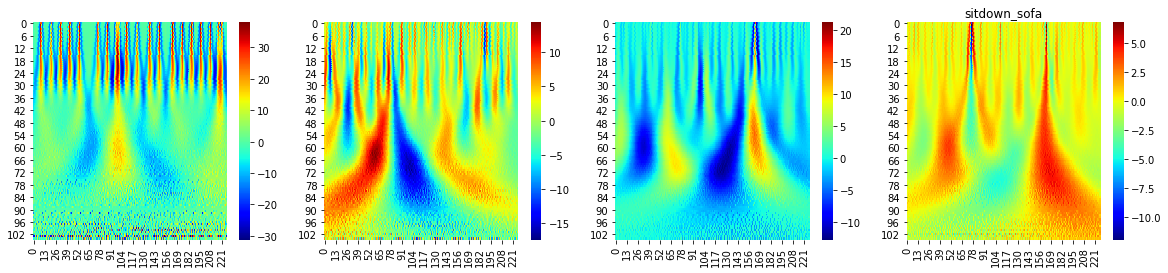

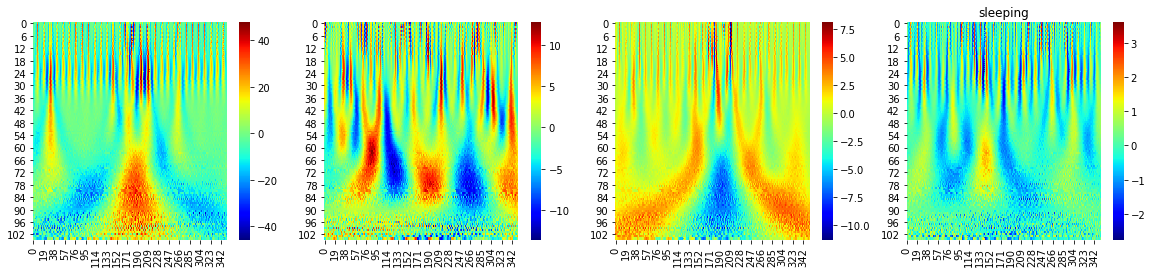

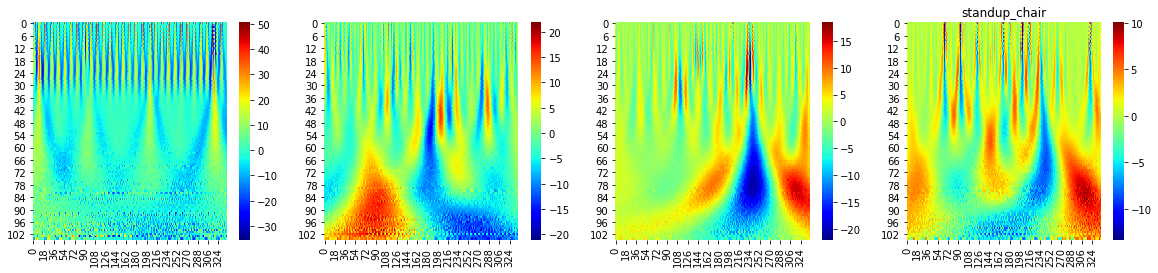

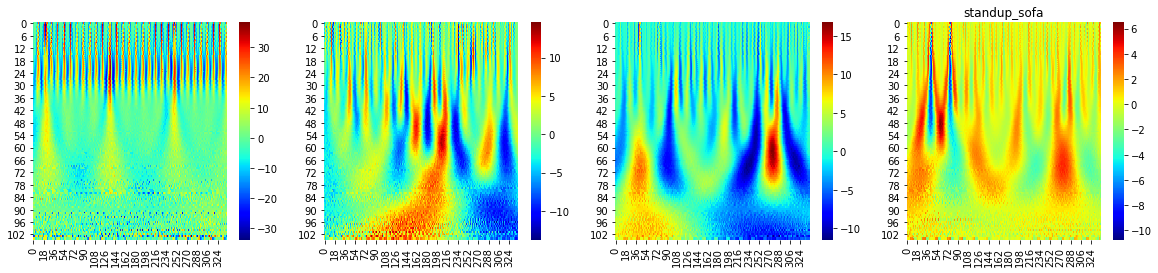

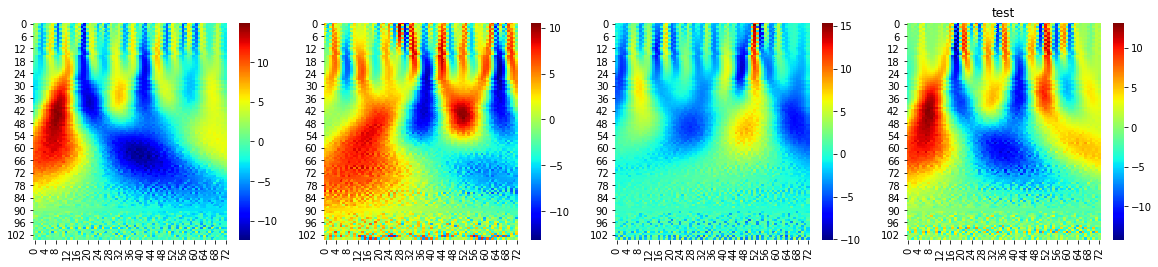

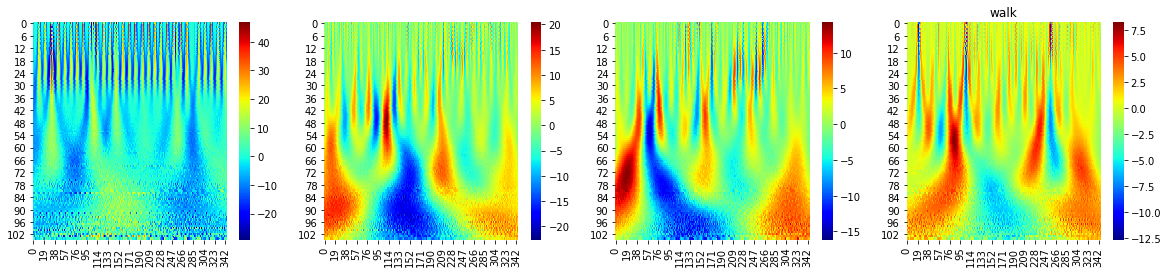

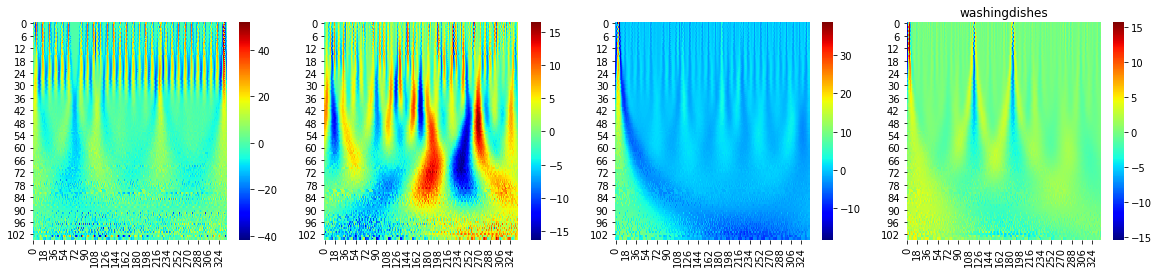

In [57]:
cwt_train=our_cwt(pca_train,True)


In [58]:
cwt_test=our_cwt(pca_test)

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes


In [59]:
def add_and_save_cwt(dir,data):
    for action in data.keys():
        for i in range(len(data[action])):
            cwts=data[action][i]
            matrix=cwts[0]
            for df in cwts[1:]:
                matrix+=df
            pd.DataFrame(matrix).to_csv(join(dir,action+f"_{i}.csv"),index=False)

        print(action)

In [60]:
add_and_save_cwt('cwt_train/',cwt_train)
add_and_save_cwt('cwt_test/',cwt_test)

        

brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes
brushteeth
cook
drink
getintobed
nothing
petcat
sitdown_chair
sitdown_sofa
sleeping
standup_chair
standup_sofa
test
walk
washingdishes
